# 机器学习练习 5 - 偏差和方差

In [1]:
import numpy as np
import scipy.io as sio
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.正则线性回归

In [2]:
sio.loadmat('ex5data1.mat')

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

In [3]:
def  load_data():
    d = sio.loadmat('ex5data1.mat')
    return map(np.ravel, [d['X'], d['y'], d['Xval'], d['yval'], d['Xtest'], d['ytest']])

In [4]:
x,y,xval,yval,xtest,ytest = load_data()
x.shape,y.shape,xval.shape,yval.shape,xtest.shape,ytest.shape

((12,), (12,), (21,), (21,), (21,), (21,))

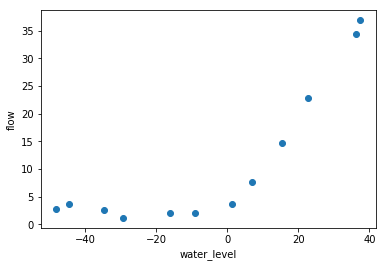

In [5]:
fig,ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('water_level')
ax.set_ylabel('flow')
plt.show()

In [6]:
x, xval, xtest = [np.insert(x.reshape(x.shape[0], 1), 0, np.ones(x.shape[0]), axis=1) for x in (x, xval, xtest)]
x.shape,y.shape,xval.shape,yval.shape,xtest.shape,ytest.shape

((12, 2), (12,), (21, 2), (21,), (21, 2), (21,))

## 1.1代价函数
<img style="float: left;" src="images/cost_reg.png">

In [7]:
def cost_reg(theta,x,y,reg):
    m = x.shape[0]
    
    inner = x @ theta - y # (12,2) @ (2,1) - (12,) = (12,1)
    
    square_sum = inner.T @ inner #(1,12) @ (12,1) = 1
    regluar = reg / (2 * m) * theta[1:] @ theta[1:] #theta为向量 也是做內积
    cost = square_sum / (2 * m) + regluar
    return cost

In [8]:
t_theta = np.array([1,1])
print(t_theta.shape)
cost_reg(t_theta,x,y,1)

(2,)


303.9931922202643

##  1.2梯度函数
<img style="float: left;" src="images/gradient_reg.png">

In [9]:
def gradient_reg(theta,x,y,reg):
    m = x.shape[0]
    delta = x @ theta - y #(12,1)
    
    regular_term = theta.copy()
    regular_term[0] = 0 #处理j=0的情况
    
    regular_term = (reg / m) * regular_term
    res = x.T @ delta / m + regular_term
    return res

In [10]:
gradient_reg(t_theta,x,y,1)

array([-15.30301567, 598.25074417])

## 1.3拟合数据

In [11]:
def linear_regression_fit(x,y,reg=1):
    
    theta = np.ones(x.shape[1])
    
    res = opt.minimize(fun=cost_reg,
                      x0=theta,
                      args=(x,y,reg),
                      jac=gradient_reg,
                      options={'disp':True})
    return res

In [12]:
res = linear_regression_fit(x,y,reg=0)
res

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6


      fun: 22.373906495108912
 hess_inv: array([[1.0297299 , 0.00612422],
       [0.00612422, 0.00121324]])
      jac: array([1.48804385e-08, 3.97027004e-07])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([13.08790353,  0.36777923])

In [13]:
#reg=0 因为对低维数据没有太大用
final_theta = linear_regression_fit(x, y, reg=0).get('x')

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6


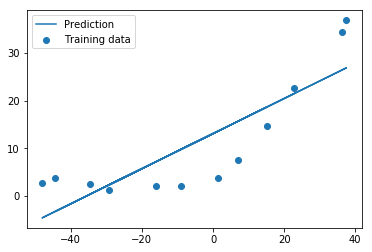

In [14]:
b = final_theta[0] # intercept
m = final_theta[1] # slope

plt.scatter(x[:,1], y, label="Training data")
plt.plot(x[:, 1], x[:, 1]*m + b, label="Prediction")
plt.legend(loc=2)
plt.show()

## 1.4学习曲线

1.使用训练集的子集来拟合应模型

2.在计算训练代价和交叉验证代价时，没有用正则化

3.记住使用相同的训练集子集来计算训练代价

<img style="float: left;" src="images/cost.png">

In [15]:
training_cost =[]
cv_cost = []
m = x.shape[0]
for i in range(1,m):
    
    res = linear_regression_fit(x[:i,:],y[:i],reg=0)
    
    tc = cost_reg(res.x, x[:i, :], y[:i], reg=0)
#     cv = cost_reg(res.x, xval[:i, :], yval[:i], reg=0)
    cv = cost_reg(res.x, xval, yval, reg=0)  #使用全部数据是否存在问题？
    training_cost.append(tc)
    cv_cost.append(cv)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 5
         Function evaluations: 6
         Gradi

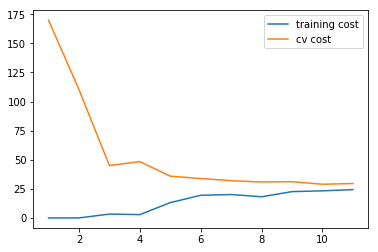

In [16]:
plt.plot(np.arange(1, m), training_cost, label='training cost')
plt.plot(np.arange(1, m), cv_cost, label='cv cost')
plt.legend(loc=1)
plt.show()

从图中可以看出算法高偏差---欠拟合

# 2.多项式回归

## 2.1创建多项式特征 

In [17]:
def poly_features(x,power):
    data = {'f{}'.format(i):np.power(x,i) for i in range(1,power+1)}
    df = pd.DataFrame(data)
    return df

In [18]:
x,y,xval,yval,xtest,ytest = load_data()

In [19]:
poly_features(x,power=3)

,f1,f2,f3
0,-15.936758,253.980260,-4047.621971
1,-29.152979,849.896197,-24777.006175
2,36.189549,1309.683430,47396.852168
3,37.492187,1405.664111,52701.422173
4,-48.058829,2309.651088,-110999.127750
5,-8.941458,79.949670,-714.866612
6,15.307793,234.328523,3587.052500
7,-34.706266,1204.524887,-41804.560890
8,1.389154,1.929750,2.680720
9,-44.383760,1969.918139,-87432.373590


## 2.2准备多项式回归数据
1. 扩展特征到 8阶,或者你需要的阶数
2. 使用 **归一化** 来合并 $x^n$ 

In [20]:
def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [21]:
def prepare_poly_data(*args,power):
    """
    args: keep feeding in X, Xval, or Xtest
        will return in the same order
    """
    def prepare(x):
        # expand feature
        df = poly_features(x, power=power)

        # normalization
        ndarr = normalize_feature(df).values

        # add intercept term
        return np.insert(ndarr, 0, np.ones(ndarr.shape[0]), axis=1)

    return [prepare(x) for x in args]

In [22]:
x_poly, xval_poly, xtest_poly= prepare_poly_data(x, xval, xtest, power=8)
x_poly.item,x_poly.shape,xval_poly.shape

(<function ndarray.item>, (12, 9), (21, 9))

In [23]:
def plot_learning_curve(x,y,xval,yval,reg=0):
    training_cost,cv_cost = [],[]
    m = x.shape[0]
    
    for i in range(1,m+1):
        res = linear_regression_fit(x[:i,:],y[:i],reg=0)
        
        tc = cost_reg(res.x,x[:i,:],y[:i],reg=0)
        cv = cost_reg(res.x,xval,yval,reg=0)
        
        training_cost.append(tc)
        cv_cost.append(cv)
        
    plt.plot(np.arange(1, m + 1), training_cost, label='training cost')
    plt.plot(np.arange(1, m + 1), cv_cost, label='cv cost')
    plt.legend(loc=1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 36
         Function evaluations: 37
         Gr

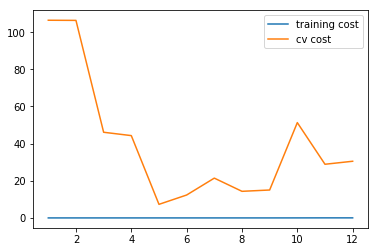

In [24]:
plot_learning_curve(x_poly, y, xval_poly, yval, reg=0)
plt.show()

你可以看到训练的代价太低了，不真实. 这是 **过拟合**了

## 2.3调整正则参数，寻找较优参数值
通过交叉验证集 ，逐步迭代进行寻找参数

Optimization terminated successfully.
         Current function value: 0.028893
         Iterations: 74
         Function evaluations: 77
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 0.174792
         Iterations: 70
         Function evaluations: 72
         Gradient evaluations: 72
Optimization terminated successfully.
         Current function value: 0.249933
         Iterations: 64
         Function evaluations: 67
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 0.385063
         Iterations: 48
         Function evaluations: 50
         Gradient evaluations: 50
Optimization terminated successfully.
         Current function value: 0.669275
         Iterations: 44
         Function evaluations: 46
         Gradient evaluations: 46
Optimization terminated successfully.
         Current function value: 1.443470
         Iterations: 38
         Function evaluations: 40
  

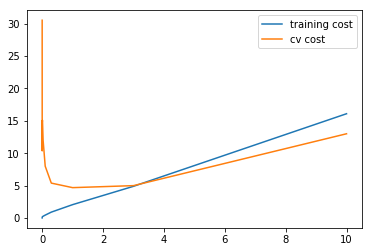

In [25]:
reg_candidate = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
training_cost, cv_cost = [], []
for i in  reg_candidate:
    
    res = linear_regression_fit(x_poly,y,reg=i)
    
    training_cost.append(cost_reg(res.x,x_poly,y,reg=0))
    cv_cost.append(cost_reg(res.x,xval_poly,yval,reg=0))

plt.plot(reg_candidate, training_cost, label='training cost')
plt.plot(reg_candidate, cv_cost, label='cv cost')
plt.legend(loc=1)
plt.show()

In [26]:
reg_candidate[np.argmin(cv_cost)]  #最优参数在cv_cost最小时

1

## 2.4用找到的reg计算测试集误差

In [27]:
theta = linear_regression_fit(x_poly, y, reg=1).x
test = cost_reg(theta, xtest_poly, ytest,reg=0)
test

Optimization terminated successfully.
         Current function value: 7.268148
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21


7.466292805486911

测试数据集在找到最好的reg=1参数下误差为7.466292805486911